In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement


In [8]:
Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The most recent date in the dataset is {recent_date}.")

The most recent date in the dataset is ('2017-08-23',).


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last_year = dt.datetime.strptime(recent_date[0],'%Y-%m-%d').date() - dt.timedelta(days=365)


In [16]:
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=last_year).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precipitation, columns=['Date', 'Precipitation']).set_index('Date').dropna()
# Sort the dataframe by date
precip_df.sort_values("Date", ascending = True, inplace=True)
#df.set_index('date', inplace=True)

precip_df


,Precipitation
Date,
2016-08-23,0.0
2016-08-23,0.5
2016-08-23,1.3
2016-08-23,17.8
2016-08-23,3.8
...,...
2017-08-22,12.7
2017-08-23,0.0
2017-08-23,2.0


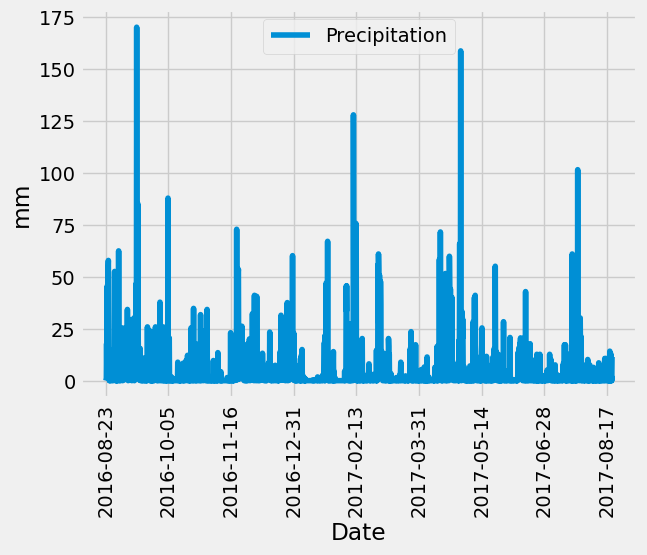

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot()
plt.ylabel("mm")
plt.xticks(rotation=90)
plt.show()


In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.station)).scalar()
print(f'The Total Number od Stations is: {station_count}' )

The Total Number od Stations is: 9


In [24]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()

(12.2, 29.4, 22.03582251082252)

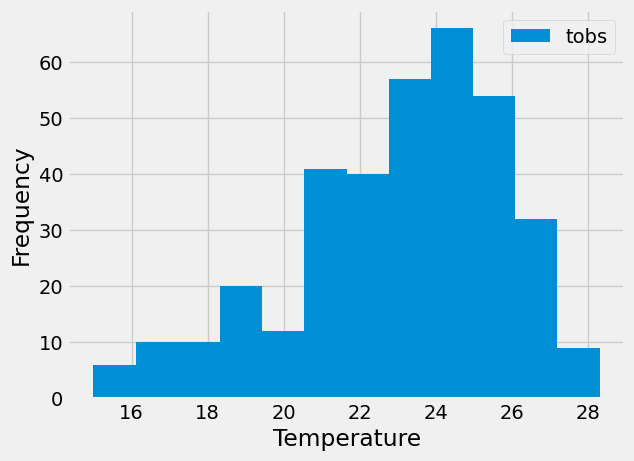

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Get the most active station id
most_active = session.query(Measurement.station).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()

# Get the recent date from the most active station id
ma_recent_date = session.query(Measurement.date).filter(Measurement.station == most_active[0]).order_by(Measurement.date.desc()).first()

# Get the last 12 month date from the most active station id
most_active_year = dt.datetime.strptime(ma_recent_date[0],'%Y-%m-%d').date() - dt.timedelta(days=365)

# Query for histogram
tobs_result = session.query(Measurement.tobs).filter(Measurement.date>=most_active_year, Measurement.station == most_active[0]).all()

# Store tobs results into dataframe
tobs_df = pd.DataFrame(tobs_result, columns = ['tobs'])

# Plot histogram with bin=12
tobs_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.show()

# Close Session

In [27]:
# Close Session
session.close()